# Capstone Project: Consumer Insights Data Analytics Externship of Beats by Dre

Kindly use this template to get an overview of the structure that you need to follow in your capstone project.

Ensure that the final insights that you produce in your analysis stand out and are easily accessible.

You need to provide the code snippets that you used to run the code.

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Megha Manoj
**Date:** 08/31/2024

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview

**Purpose**

The project aimed to enhance the understanding of consumer sentiment and feedback to inform strategic brand-building efforts. The primary objective was to leverage data science techniques to analyze large datasets of consumer reviews, uncover patterns and trends, and extract meaningful insights.

**Key Objectives**


*   Apply EDA techniques to uncover underlying patterns and trends within the datasets, providing a deeper understanding of customer behavior and preferences.
*   Use effective visualizations present relationships, correlations and insights, enabling stakeholders to make informed decisions
*   Perform comprehensive sentiment analysis on consumer reviews, determining the overall sentiment and specific sentiments related to various aspects of the brand
*   Utilize NLP tools, including Gemini AI, to interpret and summarize customer feedback, extracting key themes and sentiments that could guide brand strategy.



### 3.2 Background

Beats by Dre is a prominent audio brand, co-founded by Dr. Dre and Jimmy Iovine in 2006. Known for its stylish design and powerful bass-heavy sound, the company has revolutionized the premium headphone market. In 2014, Beats by Dre was acquired by Apple Inc., further solidifying its place in the tech industry as a leader in audio technology and lifestyle products. Consumer sentiment analysis is crucial in the tech industry because it helps to:

*   **Improve Products:** Understand customer feedback to enhance product features and user experience
*   **Monitor Brand Perception:** Track how the brand is viewed and maintain a positive reputation
*   **Stay Competitive:** Identify market trends and adapt quickly to consumer preferences
*   **Refine Marketing Strategies:** Craft messages that resonate with customers based on their sentiments
*   **Manage Crises:** Quickly respond to negative feedback to protect the brand’s image

## 4. Data Description

### 4.1 Data Sources

I gathered reviews of products (here, headphones) from Amazon for ten different products (two from Beats, while the other eight from different brands and competitors, two from each brand). Headphone brands considered:


*   Beats by Dre
*   Sony
*   Bose
*   Sennheiser
*   Audio Technica


### 4.2 Data Collection
*   **Data Selection:** Chose different models of headphones of Beats and their competitive brands and made sure to stick to similar price range in order to target similar market
*   **Web Scraping:** Used Oxylabs API to scrape the reviews into CSV files, combined them into a dataset of 1000 reviews

**Challenges Faced**
* As per the structure of Oxylabs, I could not gather reviews from beyond the 10th page. Hence, the maximum possible reviews that could be obtained from a single request is 100. Thus, in order to build a large enough dataset of 1000 reviews, I took 10 different products into consideration contrary to the 5 that was initially decided.
* Many a times, only 10 reviews were collected from a single request due to technical issues. Ideally, it should have been 100 per request. Hence, I spent lot more of time and effort on building the dataset since I had to make multiple API requests to get the required number of reviews.





### 4.3 Data Cleaning
Outline the steps taken to clean and preprocess the data, highlighting any significant decisions made during this process.

Load the data below and process cleaning here.

Major steps taken to clean and preprocess the data
*   Handling missing values
*   Dropping the duplicate rows if any
*   Converting categorical columns to numerical variables if necessary



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import google.generativeai as genai

In [ ]:
data = pd.read_csv('/content/review_dataset.csv')
#Decided to replace the empty content with 'Nil'
data['content']= data['content'].fillna('Nil')
data[data['content'].isnull()]

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes


Logically thought, product attributes like color are not mandatory in reviews. However, they are not useless too. Hence, I chose to not drop the column and decided to replace the empty product attributes with 'Unknown'


In [ ]:
data['product_attributes']= data['product_attributes'].fillna('Unknown')
data[data['product_attributes'].isnull()]
#removing duplicate rows
data.drop_duplicates()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R3IZCMYPSVY5MD,B00004SY4H,"5.0 out of 5 stars So Nice, I Bought Them Twice",Alice Majdali,5,Updated (6/20/21) - HD600's are still a great ...,"Reviewed in the United States June 19, 2017",AEMGPCOP7KJAQSGPZRNU2DBE2AXQ,True,23,Unknown
1,R2SDQ12KSFZO7,B00004SY4H,5.0 out of 5 stars A great headphone for $300,Bleak,5,"For $300, the HD600 even with it's current che...","Reviewed in the United States March 22, 2022",AHQANXFCWQKJCPESVD227DUEXJWA,True,10,Unknown
2,R4WSXVUD6BPH,B00004SY4H,5.0 out of 5 stars Beautiful Headphones,M. Rickard,5,I have sort of an emotional attachment to thes...,"Reviewed in the United States October 13, 2013",AGKZFMYNH2OTED2PX6B2HLEEXACA,True,11,Unknown
3,RYZNEGJZXKINY,B00004SY4H,5.0 out of 5 stars These are legends for a rea...,IommiFan85,5,General Thoughts: Coming from the Philips X2 t...,"Reviewed in the United States October 6, 2015",AEQKFTGXHXK4VZVNJ4OLMIJYYRUA,True,11,Unknown
4,R12JTTAEXZ62I0,B00004SY4H,4.0 out of 5 stars Solid. But not for recording.,Jamie,4,"Overall sound is lovely! Very true to tone, wo...","Reviewed in the United States July 20, 2024",AFYBVINSYY5VPS2B734AAX5SCHEQ,True,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
995,R1MC7OUB162CPK,B01AZ01E4A,3.0 out of 5 stars Sounds nice! Too bad about ...,Garland Cary,3,Full disclosure: I expect a lot from headphone...,"Reviewed in the United States July 1, 2015",AE5ZHSX52JC3DOZYOPG6GW5IFG6A,True,35,Style: Black
996,RT1RKPF0O4KZ1,B01AZ01E4A,"5.0 out of 5 stars A spectacular, neutral pair...",Amanda Bowden,5,"The MSR7 has crisp highs, tight lows, and has ...","Reviewed in the United States April 1, 2018",AGFZHSOYRXH4HU3T4WYXPR6YEESQ,True,2,Style: Gun-Metal Grey
997,R24Y77S7ZX35CW,B01AZ01E4A,2.0 out of 5 stars Ear Pads and head band dete...,Traveler,2,I have had these headphones now for over a yea...,"Reviewed in the United States June 10, 2022",AFSEMSSFBAGK2VOK2DEW5BLVHLAQ,True,3,Style: Gun-Metal Grey
998,R2A0T5VSGDAVX2,B01AZ01E4A,"4.0 out of 5 stars Bright, clean (not heavy) b...",FLY1NGSQU1RR3L,4,There are some pretty stellar reviews in here ...,"Reviewed in the United States January 24, 2019",AFFFCFFTQBJELHIZMGFTYXBBJKUA,True,7,Style: Gun-Metal Grey


Changing the type of data from objects into string, datetime and integers in order to do a better analysis. I changed the timestamp of the reviews into datetime, text content into strings and isverified stamp into integers

In [ ]:
#Change to relevant datatypes for better aid in analysis
data['timestamp'] = pd.to_datetime(data['timestamp'].str.extract(r'(\w+ \d{1,2}, \d{4})')[0])
data['review_id'] = data['review_id'].astype('string')
data['product_id'] = data['product_id'].astype('string')
data['title'] = data['title'].astype('string')
data['author'] = data['author'].astype('string')
data['content'] = data['content'].astype('string')
data['profile_id'] = data['profile_id'].astype('string')
data['is_verified'] = data['is_verified'].astype('int64')
data['product_attributes'] = data['product_attributes'].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   review_id           1000 non-null   string        
 1   product_id          1000 non-null   string        
 2   title               1000 non-null   string        
 3   author              1000 non-null   string        
 4   rating              1000 non-null   int64         
 5   content             1000 non-null   string        
 6   timestamp           1000 non-null   datetime64[ns]
 7   profile_id          1000 non-null   string        
 8   is_verified         1000 non-null   int64         
 9   helpful_count       1000 non-null   int64         
 10  product_attributes  1000 non-null   string        
dtypes: datetime64[ns](1), int64(3), string(7)
memory usage: 86.1 KB


## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview

*   Dataset comprises of 1000 gathered and cleaned reviews ready for introspection
*   Each review has 11 attributes which includes **review_id, timstamp, review content, star ratings** and much more.
*   Populated product names of the respective product IDs.



In [ ]:
data["product_name"]=''
data.loc[data['product_id'] == 'B00004SY4H', 'product_name'] = 'Sennheiser Consumer Audio HD 600 - Audiophile Hi-Res Open Back Dynamic Headphone, Black'
data.loc[data['product_id'] == 'B07DHHXZRN', 'product_name'] = 'Beats Studio3 Wireless Noise Cancelling On-Ear Headphones - Apple W1 Headphone Chip, Class 1 Bluetooth, Active Noise Cancelling, 22 Hours Of Listening Time - Defiant Black-Red'
data.loc[data['product_id'] == 'B0BXYCS74H', 'product_name'] = 'Sony WH-1000XM5 The Best Wireless Noise Canceling Headphones with Auto Noise Canceling Optimizer, Crystal Clear Hands-Free Calling, and Alexa Voice Control, Midnight Blue'
data.loc[data['product_id'] == 'B0CCZ1L489', 'product_name'] = 'Bose QuietComfort Ultra Bluetooth Headphones, Wireless Headphones with Spatial Audio, Over Ear Noise Cancelling Headphones with Mic, Up To 24 Hours of Battery Life, Black'
data.loc[data['product_id'] == 'B00SC80YLM', 'product_name'] = 'Audio-Technica ATH-M70X Closed-Back Dynamic Professional Studio Monitor Headphones, Black'
data.loc[data['product_id'] == 'B0B6GHW1SX', 'product_name'] = 'Sennheiser Consumer Audio Momentum 4 Wireless Headphones - Bluetooth Headset for Crystal-Clear Calls with Adaptive Noise Cancellation, 60h Battery Life, Lightweight Folding Design - Black'
data.loc[data['product_id'] == 'B0CCZ26B5V', 'product_name'] = 'Bose QuietComfort Bluetooth Headphones, Wireless Headphones, Over Ear Noise Cancelling Headphones with Mic, Up To 24 Hours of Battery Life, Black'
data.loc[data['product_id'] == 'B0CMZD8688', 'product_name'] = 'Beats Studio Pro with AppleCare+ for Headphones (2 Years) - Deep Brown'
data.loc[data['product_id'] == 'B0863TXGM3', 'product_name'] = 'Sony WH-1000XM4 Wireless Premium Noise Canceling Overhead Headphones with Mic for Phone-Call and Alexa Voice Control, Black WH1000XM4'
data.loc[data['product_id'] == 'B01AZ01E4A', 'product_name'] = 'Audio-Technica ATH-MSR7NC SonicPro High-Resolution Headphones with Active Noise Cancellation'


In [ ]:
#Retrieving brand names
data['brand_name']=data['product_name'].str.split().str[0]
# Convert 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])
#Check non verified reviews
data[data['is_verified'] == 0]

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,brand_name


All reviews are verified and the above code snippet creates a new column 'brand_name' and extracts brand names from the product names to populate these columns. Below is the dataset summary including key statistics.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   review_id           1000 non-null   string        
 1   product_id          1000 non-null   string        
 2   title               1000 non-null   string        
 3   author              1000 non-null   string        
 4   rating              1000 non-null   int64         
 5   content             1000 non-null   string        
 6   timestamp           1000 non-null   datetime64[ns]
 7   profile_id          1000 non-null   string        
 8   is_verified         1000 non-null   int64         
 9   helpful_count       1000 non-null   int64         
 10  product_attributes  1000 non-null   string        
 11  product_name        1000 non-null   object        
 12  brand_name          1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2), string

In [ ]:
#Provide descriptive statistics (mean, median, mode, variance, standard deviation).
# Calculate descriptive statistics of Rating
mean_rating = data['rating'].mean()
median_rating = data['rating'].median()
mode_rating = data['rating'].mode()[0]
variance_rating = data['rating'].var()
std_rating = data['rating'].std()
quantiles_rating = data['rating'].quantile([0.25, 0.5, 0.75])

print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)
print("Variance Rating:", variance_rating)
print("Standard Deviation Rating:", std_rating)
print("Quantiles Rating:", quantiles_rating)

Mean Rating: 4.454
Median Rating: 5.0
Mode Rating: 5
Variance Rating: 0.6905745745745746
Standard Deviation Rating: 0.8310081675739261
Quantiles Rating: 0.25    4.0
0.50    5.0
0.75    5.0
Name: rating, dtype: float64


In [ ]:
# Calculate descriptive statistics of Helpful Count
mean_helpfulcount = data['helpful_count'].mean()
median_helpfulcount = data['helpful_count'].median()
mode_helpfulcount = data['helpful_count'].mode()[0]
variance_helpfulcount = data['helpful_count'].var()
std_helpfulcount = data['helpful_count'].std()
quantiles_helpfulcount = data['helpful_count'].quantile([0.25, 0.5, 0.75])

print("Mean Helpful Count:", mean_helpfulcount)
print("Median Helpful Count:", median_helpfulcount)
print("Mode Helpful Count:", mode_helpfulcount)
print("Variance Helpful Count:", variance_helpfulcount)
print("Standard Deviation Helpful Count:", std_helpfulcount)
print("Quantiles Helpful Count:", quantiles_helpfulcount)

Mean Helpful Count: 17.885
Median Helpful Count: 1.0
Mode Helpful Count: 0
Variance Helpful Count: 10225.355130130132
Standard Deviation Helpful Count: 101.12049807101492
Quantiles Helpful Count: 0.25    0.0
0.50    1.0
0.75    4.0
Name: helpful_count, dtype: float64


### 5.2 Visualizations
Include relevant visualizations (histograms, box plots, scatter plots, etc.) and explain what each visualization reveals about the data.

**Distribution of Ratings per Brand Name**

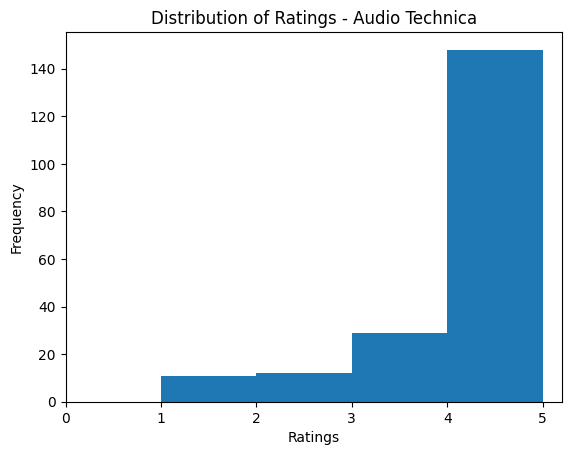

In [ ]:
plt.hist(data[data['brand_name'] == 'Audio-Technica']['rating'], bins=4)
plt.title('Distribution of Ratings - Audio Technica')
plt.xlabel('Ratings')
plt.xticks(np.arange(0, 6, step=1))
plt.ylabel('Count')
plt.ylabel('Frequency')
plt.show()

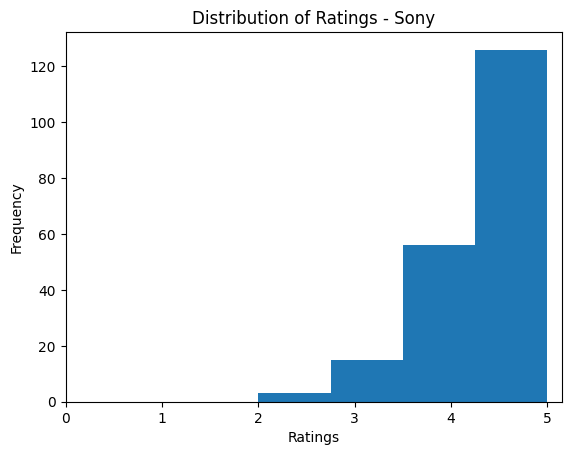

In [ ]:
plt.hist(data[data['brand_name'] == 'Sony']['rating'], bins=4)
plt.title('Distribution of Ratings - Sony')
plt.xlabel('Ratings')
plt.xticks(np.arange(0, 6, step=1))
plt.ylabel('Count')
plt.ylabel('Frequency')
plt.show()

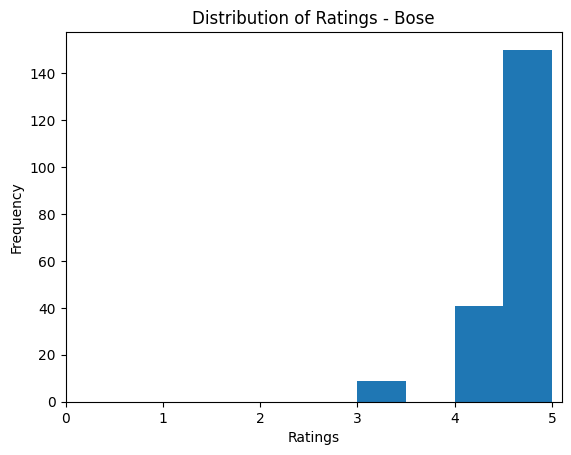

In [ ]:
plt.hist(data[data['brand_name'] == 'Bose']['rating'], bins=4)
plt.title('Distribution of Ratings - Bose')
plt.xlabel('Ratings')
plt.xticks(np.arange(0, 6, step=1))
plt.ylabel('Count')
plt.ylabel('Frequency')
plt.show()

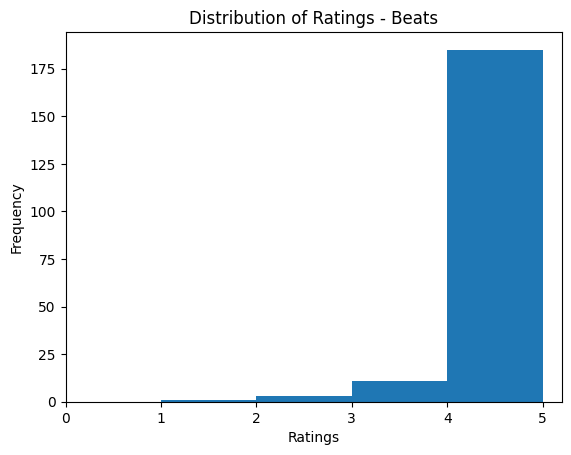

In [ ]:
plt.hist(data[data['brand_name'] == 'Beats']['rating'], bins=4)
plt.title('Distribution of Ratings - Beats')
plt.xlabel('Ratings')
plt.xticks(np.arange(0, 6, step=1))
plt.ylabel('Count')
plt.ylabel('Frequency')
plt.show()

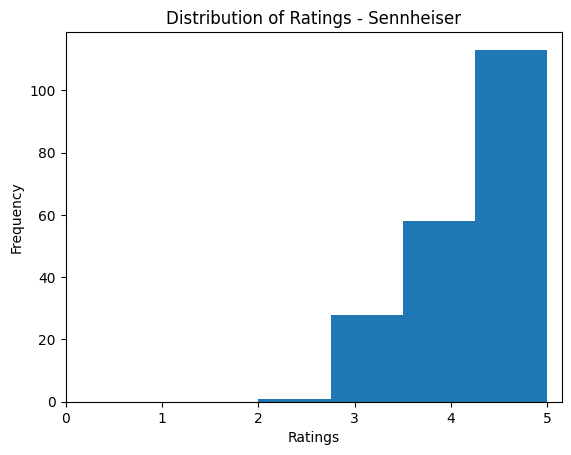

In [ ]:
plt.hist(data[data['brand_name'] == 'Sennheiser']['rating'], bins=4)
plt.title('Distribution of Ratings - Sennheiser')
plt.xlabel('Ratings')
plt.xticks(np.arange(0, 6, step=1))
plt.ylabel('Count')
plt.ylabel('Frequency')
plt.show()

All the products from all the brands generally have good rating with all the distributions being left skewed

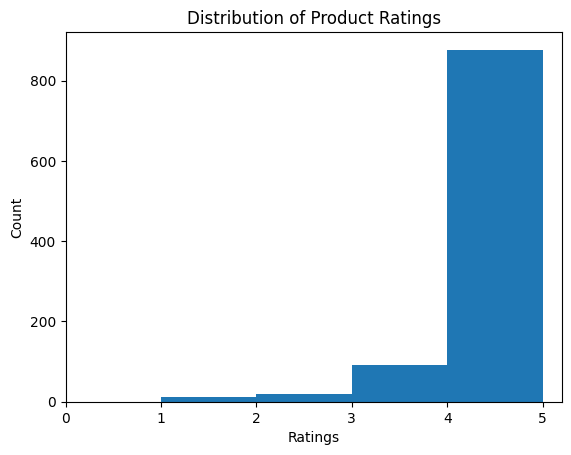

In [ ]:
plt.hist(data['rating'], bins=4)
plt.title('Distribution of Product Ratings')
plt.xlabel('Ratings')
plt.xticks(np.arange(0, 6, step=1))
plt.ylabel('Count')
plt.show()

The histogram is left skewed, with a larger number of good reviews for all our products selected. There is no different pattern even when we check each brand separately

In [ ]:
# Extract the ratings column
ratings = data['rating']
# Count the number of products for each rating
rating_counts = ratings.value_counts().sort_index()
# Display the rating counts
print(rating_counts)

rating
1     12
2     19
3     92
4    257
5    620
Name: count, dtype: int64


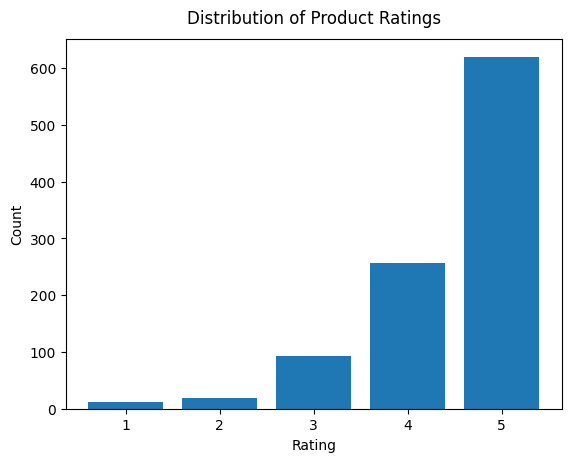

In [ ]:
#   Plotting a bar plot of the distribution of the product ratings.
plt.bar(rating_counts.index, rating_counts.values)
plt.title("Distribution of Product Ratings", y=1.02)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Out of the 1000 product reviews, more than 60% of the reviews are 5 rated and around 25% of the reviews are 4 rated. The presence of the other ratings are very less.

I assigned a rating level label to the reviews and keep the threshold to be marked good as 4

In [ ]:
# 'rating_level' based on the 'rating' column
data['rating_level'] = data['rating'].apply(lambda x: 'poor' if x < 4 else 'good')
data.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,brand_name,rating_level
0,R3IZCMYPSVY5MD,B00004SY4H,"5.0 out of 5 stars So Nice, I Bought Them Twice",Alice Majdali,5,Updated (6/20/21) - HD600's are still a great ...,2017-06-19,AEMGPCOP7KJAQSGPZRNU2DBE2AXQ,1,23,Unknown,Sennheiser Consumer Audio HD 600 - Audiophile ...,Sennheiser,good
1,R2SDQ12KSFZO7,B00004SY4H,5.0 out of 5 stars A great headphone for $300,Bleak,5,"For $300, the HD600 even with it's current che...",2022-03-22,AHQANXFCWQKJCPESVD227DUEXJWA,1,10,Unknown,Sennheiser Consumer Audio HD 600 - Audiophile ...,Sennheiser,good
2,R4WSXVUD6BPH,B00004SY4H,5.0 out of 5 stars Beautiful Headphones,M. Rickard,5,I have sort of an emotional attachment to thes...,2013-10-13,AGKZFMYNH2OTED2PX6B2HLEEXACA,1,11,Unknown,Sennheiser Consumer Audio HD 600 - Audiophile ...,Sennheiser,good
3,RYZNEGJZXKINY,B00004SY4H,5.0 out of 5 stars These are legends for a rea...,IommiFan85,5,General Thoughts: Coming from the Philips X2 t...,2015-10-06,AEQKFTGXHXK4VZVNJ4OLMIJYYRUA,1,11,Unknown,Sennheiser Consumer Audio HD 600 - Audiophile ...,Sennheiser,good
4,R12JTTAEXZ62I0,B00004SY4H,4.0 out of 5 stars Solid. But not for recording.,Jamie,4,"Overall sound is lovely! Very true to tone, wo...",2024-07-20,AFYBVINSYY5VPS2B734AAX5SCHEQ,1,0,Unknown,Sennheiser Consumer Audio HD 600 - Audiophile ...,Sennheiser,good


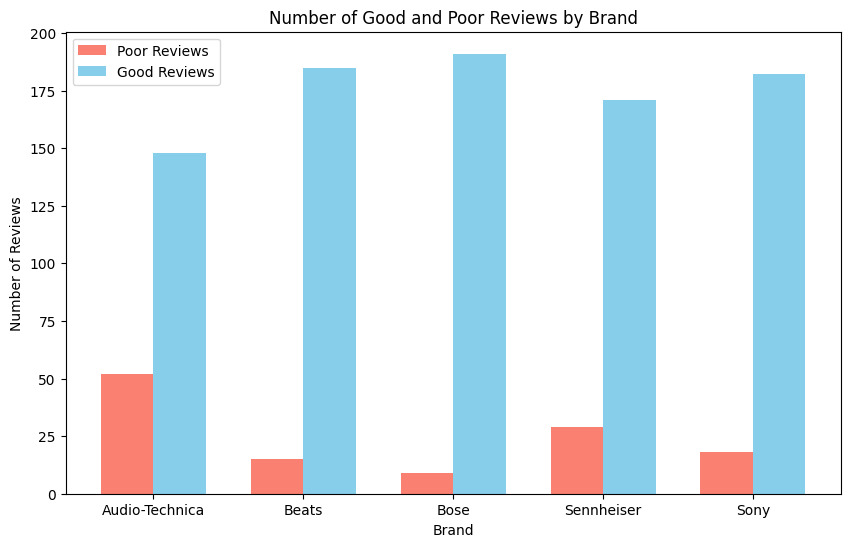

In [ ]:
# Grouping the data by 'brand' and 'rating_level' and count the number of reviews
review_counts = data.groupby(['brand_name', 'rating_level']).size().unstack(fill_value=0)
# Create a paired bar graph
brands = review_counts.index
poor_reviews = review_counts['poor']
good_reviews = review_counts['good']
x = np.arange(len(brands))  # the label locations
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, poor_reviews, width, label='Poor Reviews', color='salmon')
bars2 = ax.bar(x + width/2, good_reviews, width, label='Good Reviews', color='skyblue')
ax.set_xlabel('Brand')
ax.set_ylabel('Number of Reviews')
ax.set_title('Number of Good and Poor Reviews by Brand')
ax.set_xticks(x)
ax.set_xticklabels(brands)
ax.legend()
plt.show()

Most number of poor rated reviews come from Audio-Technicia and Sennheiser and

*   Most number of poor rated reviews come from Audio-Technicia
*   The number of poor rated reviews drastically varies between brands
*   On the other hand, there is a fair number of positive reviews per brand


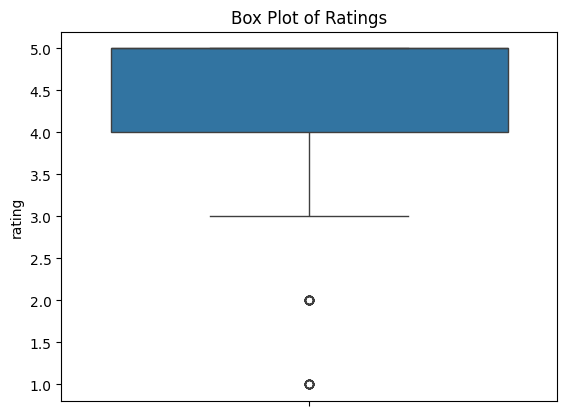

In [ ]:
# Check the rating distribution
sns.boxplot(y="rating", data=data)
plt.title('Box Plot of Ratings')
plt.xticks(rotation=90)
plt.show()

Created a new column to capture the length of the reviews

In [ ]:
data["review_length"]= data["content"].str.len()

We can take the reviews with rating more than 3 in our dataset since others act as outliers. But since we look at the sentiments associated with each rating, I refrain from dropping these records and instead I go ahead with them.

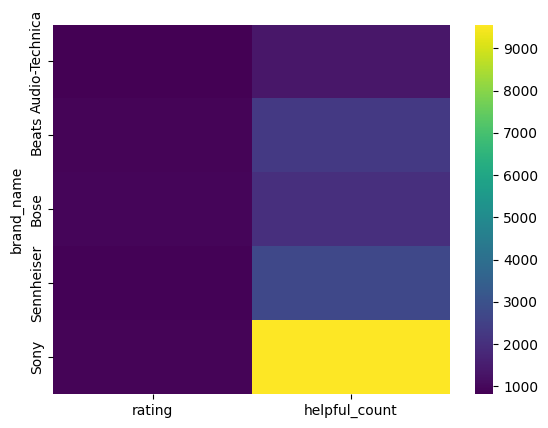

In [ ]:
grouped_brand = data.groupby('brand_name').sum(numeric_only=True)
sns.heatmap(grouped_brand[['rating','helpful_count']], cmap='viridis')
plt.show()

**Relationship between Rating and Helpful Count**

Covariance Matrix
[[ 6.90574575e-01 -1.71350350e+00]
 [-1.71350350e+00  1.02253551e+04]]
--------------------
Covariance of rating and helpful count: -1.7135035035035016
--------------------
Correlation Coefficient (r): -0.02039109295387351
--------------------
p-value: 0.5195213216130814


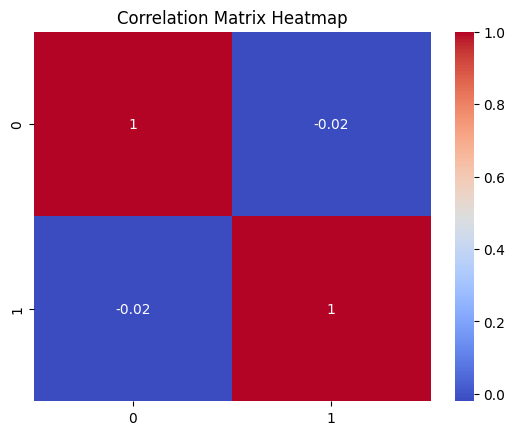

In [ ]:
# Calculate covariance matrix
cov_matrix = np.cov(data['rating'], data['helpful_count'])
print("Covariance Matrix")
print(cov_matrix)
print("--------------------")
# Calculate covariance using pandas
cov_xy = data['rating'].cov(data['helpful_count'])
print("Covariance of rating and helpful count:", cov_xy)
print("--------------------")
# Calculate correlation coefficient using scipy
r, p_value = pearsonr(data['rating'], data['helpful_count'])
print("Correlation Coefficient (r):", r)
print("--------------------")
print("p-value:", p_value)
# Heatmap of the correlation matrix
corr_matrix = np.corrcoef(data['rating'],data['helpful_count'])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

        is_verified  helpful_count  review_length
rating                                           
1                12             82           8753
2                19           2022          30522
3                92            873         165920
4               257           3337         333167
5               620          11571         644163


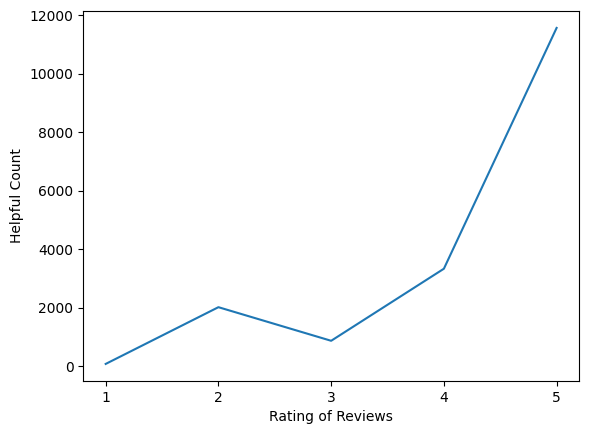

In [ ]:
grouped_sum = data.groupby('rating').sum(numeric_only=True)
print(grouped_sum)
plt.plot(grouped_sum.index, grouped_sum['helpful_count'])
plt.xticks(np.arange(1, 6, step=1))
plt.xlabel("Rating of Reviews")
plt.ylabel("Helpful Count")
plt.show()

Though not linear, it looks like the better rated reviews are more helpful to the customers than the poorer ones

**Relationship between length of the review and the number of people who have marked these reviews as helpful**

Covariance Matrix
[[2224320.26564064   60868.38375876]
 [  60868.38375876   10225.35513013]]
--------------------
Covariance of Review Length and helpful count: 60868.38375875876
--------------------
Correlation Coefficient (r): 0.4036025585103364
--------------------
p-value: 1.8251127652054104e-40


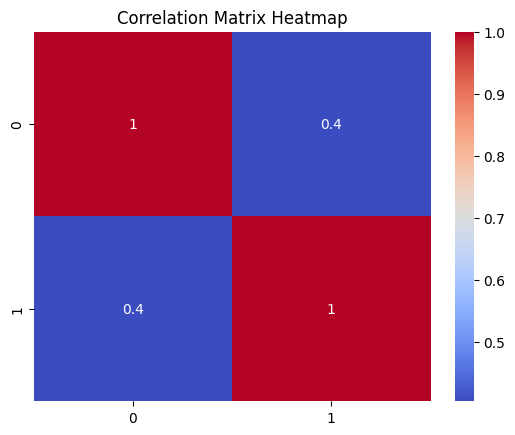

In [ ]:
# Calculate covariance matrix
data['review_length'] = data['review_length'].astype('int64')
cov_matrix = np.cov(data['review_length'], data['helpful_count'])
print("Covariance Matrix")
print(cov_matrix)
print("--------------------")
# Calculate covariance using pandas
cov_xy = data['review_length'].cov(data['helpful_count'])
print("Covariance of Review Length and helpful count:", cov_xy)
print("--------------------")
# Calculate correlation coefficient using scipy
r, p_value = pearsonr(data['review_length'], data['helpful_count'])
print("Correlation Coefficient (r):", r)
print("--------------------")
print("p-value:", p_value)
# Heatmap of the correlation matrix
corr_matrix = np.corrcoef(data['review_length'],data['helpful_count'])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
data[['rating','helpful_count','review_length']].corr()

,rating,helpful_count,review_length
rating,1.000000,-0.020391,-0.117859
helpful_count,-0.020391,1.000000,0.403603
review_length,-0.117859,0.403603,1.000000


There is a considerable correlation between length of the reviews and the number of people who have marked these reviews as helpful. Now, let's delve deeper.

        is_verified  helpful_count  review_length
rating                                           
1                12             82           8753
2                19           2022          30522
3                92            873         165920
4               257           3337         333167
5               620          11571         644163


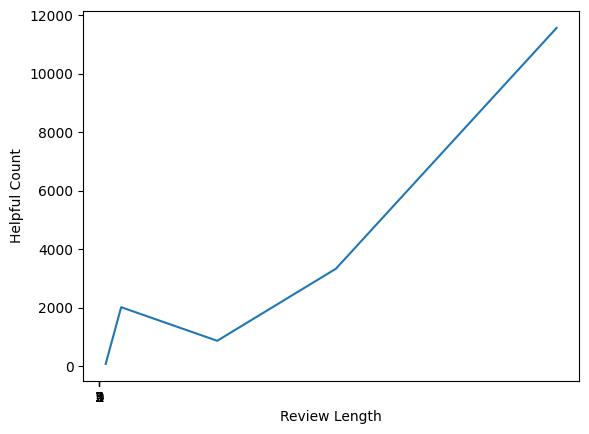

In [ ]:
grouped_sum = data.groupby('rating').sum(numeric_only=True)
print(grouped_sum)
plt.plot(grouped_sum['review_length'], grouped_sum['helpful_count'])
plt.xticks(np.arange(0, 6, step=1))
plt.xlabel("Review Length")
plt.ylabel("Helpful Count")
plt.show()

Considerably linear relationship is visible at increased review lengths

### 5.3 Descriptive Statistics

*   The distribution of rating is left skewed, with a larger number of good reviews for all our selected products
*  More than 60% of the reviews are 5 star rated and around 25% of the reviews are 4 star rated. The presence of the other ratings are very minimal
*   Most number of poorly rated reviews come from Audio-Technica, thus reducing the intensity of the competition offered to Beats
*   Generally, the better rated reviews are more helpful to the customers than the poorer ones
*   Lengthy reviews are more helpful to the customers than the shorter ones. Increased length indicates that those reviews are more detailed and explains better, thus proving more helpful to the customers









## 6. Sentiment Analysis

### 6.1 Methodology

*  Uses Textblob to analyze the review content, calculate the polarity and tag the reviews as positive, negative or neutral
*  Create a new column named 'sentiment' and populate them with these respective labels
*   Calculate the aggregated sentiment scores and generalize the sentiments
*   Analyze the same sentiments per brand as well

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

# Function to analyze sentiment using TextBlob
def analyze_sentiment(review):
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
data['sentiment'] = data['content'].apply(analyze_sentiment)
# Display data with sentiment
data.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,brand_name,rating_level,review_length,sentiment
0,R3IZCMYPSVY5MD,B00004SY4H,"5.0 out of 5 stars So Nice, I Bought Them Twice",Alice Majdali,5,Updated (6/20/21) - HD600's are still a great ...,2017-06-19,AEMGPCOP7KJAQSGPZRNU2DBE2AXQ,1,23,Unknown,Sennheiser Consumer Audio HD 600 - Audiophile ...,Sennheiser,good,3580,positive
1,R2SDQ12KSFZO7,B00004SY4H,5.0 out of 5 stars A great headphone for $300,Bleak,5,"For $300, the HD600 even with it's current che...",2022-03-22,AHQANXFCWQKJCPESVD227DUEXJWA,1,10,Unknown,Sennheiser Consumer Audio HD 600 - Audiophile ...,Sennheiser,good,2529,positive
2,R4WSXVUD6BPH,B00004SY4H,5.0 out of 5 stars Beautiful Headphones,M. Rickard,5,I have sort of an emotional attachment to thes...,2013-10-13,AGKZFMYNH2OTED2PX6B2HLEEXACA,1,11,Unknown,Sennheiser Consumer Audio HD 600 - Audiophile ...,Sennheiser,good,4599,positive
3,RYZNEGJZXKINY,B00004SY4H,5.0 out of 5 stars These are legends for a rea...,IommiFan85,5,General Thoughts: Coming from the Philips X2 t...,2015-10-06,AEQKFTGXHXK4VZVNJ4OLMIJYYRUA,1,11,Unknown,Sennheiser Consumer Audio HD 600 - Audiophile ...,Sennheiser,good,3985,positive
4,R12JTTAEXZ62I0,B00004SY4H,4.0 out of 5 stars Solid. But not for recording.,Jamie,4,"Overall sound is lovely! Very true to tone, wo...",2024-07-20,AFYBVINSYY5VPS2B734AAX5SCHEQ,1,0,Unknown,Sennheiser Consumer Audio HD 600 - Audiophile ...,Sennheiser,good,1038,positive


### 6.2 Results



In [ ]:
# Aggregate sentiment scores
sentiment_counts = data['sentiment'].value_counts()
print("\nSentiment Counts:\n", sentiment_counts)
# Assess overall sentiment
overall_sentiment = sentiment_counts.idxmax()
print(f"\nOverall Consumer Sentiment: {overall_sentiment}")


Sentiment Counts:
 sentiment
positive    963
negative     23
neutral      14
Name: count, dtype: int64

Overall Consumer Sentiment: positive


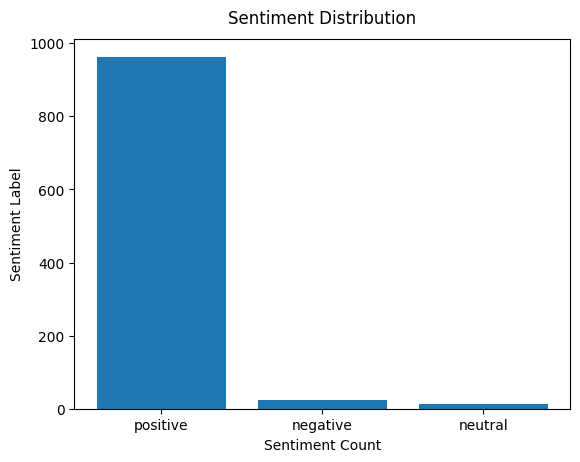

In [ ]:
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("Sentiment Distribution", y=1.02)
plt.xlabel("Sentiment Count")
plt.ylabel("Sentiment Label")
plt.show()

In [ ]:
# Aggregate sentiment scores per brand
sentiment_counts_per_brand = data.groupby('brand_name')['sentiment'].value_counts().unstack().fillna(0)
print("\nSentiment Counts per Brand:")
print(sentiment_counts_per_brand)

# Determine overall sentiment per brand
overall_sentiment_per_brand = sentiment_counts_per_brand.idxmax(axis=1)
print("\nOverall Consumer Sentiment per Brand:")
print(overall_sentiment_per_brand)


Sentiment Counts per Brand:
sentiment       negative  neutral  positive
brand_name                                 
Audio-Technica         6        2       192
Beats                  3        6       191
Bose                   3        2       195
Sennheiser             8        3       189
Sony                   3        1       196

Overall Consumer Sentiment per Brand:
brand_name
Audio-Technica    positive
Beats             positive
Bose              positive
Sennheiser        positive
Sony              positive
dtype: object



**When summarized:**

* Most reviews are concentrated around the higher end of the scale, indicating that the majority of customers are generally satisfied with the products.
* Ratings below 3 were identified as outliers. Though these reviews are comparitively less in number. I did not let go of them so that these can be investigated further to understand the reasons behind the low ratings.
* Majority of reviews are classified as positive, followed by negative and neutral sentiments. Positive reviews often highlight aspects such as product quality, ease of use, and value for money.
* Speaking brand specific, Beats has significant competition from all the selected competitor brands - but analying number positive rated reviews and review text sentiment - Bose and Sony are the biggest competitor

**Potential Implications**

*   Since the overall sentiment for Beats is positive, its a good news for the brand
*   Few negative/poor reviews should be analysed separate to extract words that depict the negative sentiment, investigate the problem and work on it to improve more in product quality and in sales.
* Some reviews can also be due to poor customer service. Such can be noted to improve the service more
*  The positive words from the positive reviews can be taken into account so that the USP of Beats can be highlighted to develop even better marketing strategies




## 7. AI-Generated Insights

### 7.1 Using Gemini AI



*   Set up a project and retrieved a person API key from Google AI studio
*   Used this confidential key to set up an API pipeline and gave prompts along with the data to Gemini AI
*   Exercised AI prompt engineering to delve deep and collect AI generated insights


In [ ]:
#My API Key
api_key="put your key"
def analyze_reviews(api_key,reviews,prompt):

  genai.configure(api_key=api_key)
  model = genai.GenerativeModel(
      model_name="gemini-1.5-flash",
      generation_config={
          "temperature":1,
          "top_p":0.95,
          "top_k":64,
          "max_output_tokens":8192,
          "response_mime_type":"text/plain"
      },
  )
  chat_session = model.start_chat(history=[])
  response = chat_session.send_message(prompt.join(reviews))
  return response.text



*   Addressed negative reviews to extract pain points and most frequent complaint mentioned in these reviews
*   Addressed positive reviews to analyse the strength of each feature and strengthen the marketing strategies
*   Each of these were done in general context as well as for Beats by Dre specifically in order to understand it's customer feedback and general sentiments
*   An example of a prompting code snippet is given below

In [ ]:
reviews = data[(data['sentiment'] == 'negative') & (data['brand_name']=='Beats')]['content'].tolist()
prompt = "How many comments mention bad customer support from the following reviews:\\n\\n" + "\\n\\n"
insights = analyze_reviews(api_key,reviews,prompt)
print(insights)

Only **one** of the reviews mentions bad customer support. 

Here's why:

* **Review 1:**  Explicitly states "Contacted Apple and they state the warranty will not cover any issues. I am highly disappointed." This is a clear complaint about customer service (specifically, Apple's response to their warranty issue).
* **Review 2:**  This review is entirely positive and doesn't mention any issues with customer service or support. 



### 7.2 Key Insights

**Insight (1)**

Major pain points highlighted in the negative reviews include issues related to design, connectivity, sound quality and customer service

**Prompt**

Analyze the following negative reviews and summarize the key pain points

**Response**

Here's a summary of the key pain points from the negative reviews:

**General Issues:**

* **Flimsy Design & Construction:**  Several reviews highlight concerns about the headphones' build quality, especially the weak connection points on the cables and the use of thin, creaky plastic.  This leads to frequent breakages and a short lifespan, especially with heavy use.
* **Expensive Replacements:**  The cost of replacement cables and parts is criticized, especially when considering the relatively high initial price of the headphones. The lack of readily available and affordable aftermarket options also adds to the frustration.
* **Bluetooth Connection Problems:** Many reviewers report issues with Bluetooth connectivity, including choppy audio, random disconnections, and unintended connections to multiple devices, especially when using the headphones with multiple Bluetooth sources (e.g., phone and TV).
* **Touch Control Issues:** The touch controls on the headphones are often described as unreliable and prone to accidental activations, leading to unwanted changes in settings or playback.

**Sound Quality & Features:**

* **Sound Quality Not As Expected:**  While some reviews praise the sound quality, others find it to be average or even disappointing, especially compared to competitor products. Some reviewers mention a lack of bass, while others mention an overly analytical sound signature.
* **Noise Cancellation Effectiveness:**  Reviews are mixed about the noise cancellation performance, with some finding it ineffective at blocking out specific types of noise like air conditioning.
* **Microphone Issues:**  Several reviewers note that the microphone picks up ambient noise, making it unsuitable for clear communication in noisy environments.

**Other Complaints:**

* **Lack of Instructions:**  Some users complain about the lack of clear instructions for setup and use, requiring them to contact customer support or search online for information.
* **Short Charging Cable:**  Reviewers criticize the short length of the charging cable, which makes it inconvenient to use with some power sources or setups.
* **Unreliable Customer Support:**  Some reviews mention difficulties reaching customer support for RMA requests or other assistance.

**Overall, the reviews indicate that while the headphones may offer decent sound quality, they are plagued by a number of design flaws and reliability issues. The flimsy construction, connectivity problems, touch control issues, and lack of durable and affordable replacement parts are significant concerns for potential buyers. These problems are compounded by the relatively high price point.**



---




**Insight (2)**

Reviews pertaining to these pain points are analyzed among the Beats headphone reviews, only to find one such review

**Prompt**

How many comments mention bad customer support from the following reviews?

**Response**

Only the first review mentions bad customer support.

Here's why:

* **Review 1:**  Explicitly states "Contacted Apple and they state the warranty will not cover any issues" indicating a negative customer support experience.
* **Review 2:** This review focuses on the positive aspects of the product and doesn't mention any issues with customer support.

Therefore, only **1 review** mentions bad customer support.



---




**Insight (3)**

The two major improvements suggested for improvement of Beats headphones are on sound quality and customer service

**Prompt**

Based on the reviews from these, suggest two main improvements for the product

**Response**

Based on the reviews, here are two main improvements for the headphones:

1. **Improve Sound Quality, Especially Bass:** The first reviewer specifically mentions poor sound quality, especially with bass.  This suggests that the headphones may need a redesign of the drivers or the acoustic chamber to deliver a more balanced and powerful sound experience.
2. **Offer Clearer Warranty Information:** The first reviewer was disappointed by the lack of an Apple iCare warranty when purchasing through Amazon. To address this, the manufacturer should:
    * **Clearly state on product pages and packaging** if the warranty is offered for purchases from specific retailers (e.g., Amazon).
    * **Provide a dedicated section** on their website with information about warranty coverage, including specifics for different retailers.

These improvements would address the concerns raised by the reviewers and make the headphones more appealing to potential customers.


---




**Insight (4)**

The major positive features about the Beats headphone are noise cancellation, comfort and battery life of which the best feature is selected

**Prompt**

What are the 3 main unique selling points of the product according to the reviews?

**Response**

Here are 3 common unique selling points of the Beats Studio 3 headphones, according to your provided reviews:

1. **Excellent Noise Cancellation:**  Many reviewers praise the noise cancellation, highlighting its ability to effectively block out ambient noise like fans, trains, and even conversations. This makes them ideal for focusing on music, podcasts, or work in noisy environments.
2. **Comfortable Fit:**  Reviewers consistently mention the comfortable fit of the Beats Studio 3. They describe the earcups as plush and the headband as well-padded, allowing for extended wear without discomfort.
3. **Strong Battery Life:**  A common theme is the long battery life, often exceeding the advertised 22 hours with noise cancellation on. This is a big plus for frequent travelers or those who use their headphones for extended periods.


### 7.3 Interpretation


*   Out of the identified pain points, after checking for the presence of each of these negative points in the Beats review, only one review was found that highlights these
*   It can be interpreted as a case of misplaced or damaged product shipped from the seller
* The USP of Beats headphone is identified as it's amazing noise cancellation ability. Highlighting the noise cancellation feature would appeal to a wide audience, emphasizing a key benefit that many reviewers value and that distinguishes the headphones from competitors.



## 8. Comparative Analysis

### 8.1 Competitor Overview


### 1. **Beats by Dre**
- **Positioning:** Focuses on style and brand appeal, targeting younger, fashion-conscious consumers. Known for a bass-heavy sound profile.
- **Consumer Sentiment:** Highly positive, praised for design, comfort and noise cancellation but sometimes critiqued for an overpowering bass.

### 2. **Audio-Technica**
- **Positioning:** Appeals to audiophiles and professionals with accurate sound reproduction and competitive pricing.
- **Consumer Sentiment:** Highly positive, especially for sound clarity and value for money.

### 3. **Sony**
- **Positioning:** Offers a range of headphones, excelling in noise-canceling and wireless technology, targeting tech-savvy consumers.
- **Consumer Sentiment:** Very positive, particularly for noise cancellation and advanced features.

### 4. **Bose**
- **Positioning:** Specializes in premium noise-canceling headphones, targeting frequent travelers and professionals.
- **Consumer Sentiment:** Highly positive, lauded for superior noise cancellation and comfort, albeit at a higher price point.

### 5. **Sennheiser**
- **Positioning:** Known for high-quality audio and durable build, targeting audiophiles and professionals seeking balanced sound.
- **Consumer Sentiment:** Generally very positive, valued for sound quality and durability, though some products are more expensive.

### **Overall Market Positioning**

- **Beats by Dre** and **Sony** appeal to a wide audience, from young consumers to tech enthusiasts
- **Audio-Technica** and **Sennheiser** cater to those prioritizing sound accuracy
- **Bose** focuses on premium users who value bass and comfort, especially frequent travelers

### 8.2 Comparison of Sentiments


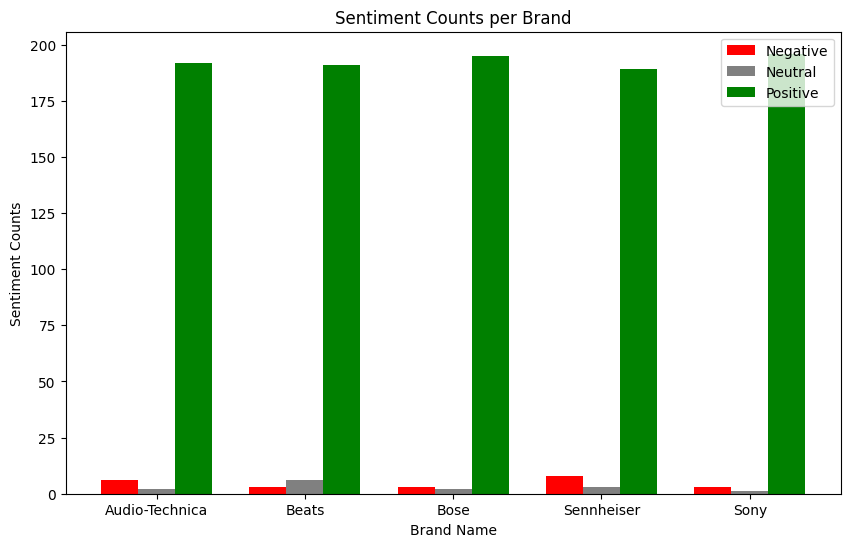

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
# Define the width of each bar
bar_width = 0.25
# Set the position of each group of bars on the x-axis
bar_positions = range(len(sentiment_counts_per_brand))

# Plot each sentiment category as a separate set of bars
ax.bar(bar_positions, sentiment_counts_per_brand['negative'], width=bar_width, label='Negative', color='red')
ax.bar([p + bar_width for p in bar_positions], sentiment_counts_per_brand['neutral'], width=bar_width, label='Neutral', color='grey')
ax.bar([p + bar_width*2 for p in bar_positions], sentiment_counts_per_brand['positive'], width=bar_width, label='Positive', color='green')

# Set the x-axis labels to the brand names
ax.set_xticks([p + bar_width for p in bar_positions])
ax.set_xticklabels(sentiment_counts_per_brand.index)

# Add labels and title
ax.set_xlabel('Brand Name')
ax.set_ylabel('Sentiment Counts')
ax.set_title('Sentiment Counts per Brand')

# Add a legend
ax.legend()

# Show the plot
plt.show()

*   All the brands mostly have positive sentiment associated with them.
*   Beats as a brand also have very high positive sentiments associated with their products.
*   While it's competitor brands have more negative sentiments than neutral sentiments, Beats have more neutral sentiment score than negative sentiment score, hinting towards it's commendable hold on the market.




### 8.3 SWOT Analysis
Conduct a SWOT analysis (Strengths, Weaknesses, Opportunities, Threats) for Beats by Dre based on the comparative data.


**Strengths**
- Well-known among younger audiences, thanks to its stylish design and celebrity endorsements.
- Strong customer satisfaction with a high number of positive reviews.
- Benefits from being part of the Apple ecosystem, offering seamless compatibility.
-Appeals as a fashion and lifestyle brand, not just audio equipment.

**Weaknesses**
- Seen as expensive compared to competitors with similar or better sound quality.
- The bass-heavy sound may not appeal to audiophiles who prefer a balanced sound.

**Opportunities**
- Potential to expand product lines with varied sound profiles and features.
- Use Apple’s distribution and marketing to reach new markets.
- Expanding demand for wireless devices offers innovation opportunities.
- Adopting eco-friendly practices could attract new customers.

**Threats**
- Competitors like Sony, Bose, and Sennheiser are strong and innovative.
- Consumers are increasingly seeking value for money and sound quality.
- Premium pricing might be a disadvantage in economic downturns.
- Any negative perception or quality issues could harm the brand's image.


## 9. Strategic Recommendations

### 9.1 Product Improvements


**Diversify Sound Profiles**
- Offer models with a more balanced sound profile to attract audiophiles.
- Allow users to adjust sound settings to their preferences.

**Enhance Value**
- Upgrade these features to match competitors like Sony and Bose.
- Ensure headphones are comfortable for long wear and built to last.

**Expand Product Range**
- Introduce more affordable options to attract a wider audience.
- Develop new features like advanced voice assistant integration and spatial audio.

**Sustainability Focus**
- Incorporate sustainable materials to appeal to eco-conscious consumers.
- Enhance transparency in manufacturing and sourcing.

**Leverage Customer Feedback**
- Use customer feedback to make continual improvements.
- Engage customers in product design to better meet their needs.

### 9.2 Marketing Strategies


**Emphasize Product Quality**
   - Highlight technical features like sound quality and noise cancellation through educational content.
   -Use comparisons to showcase strengths over competitors, focusing on performance and integration with Apple products.

**Targeted Campaigns**
   - Create campaigns emphasizing sound quality and durability, featuring endorsements from music professionals.
   -Continue using celebrity endorsements and influencers to appeal to younger, style-focused audiences.

**Promote Sustainability**
   - Market sustainability initiatives, such as recyclable materials, to attract environmentally conscious customers.
   -Showcase ethical practices in sourcing and manufacturing to build trust.

**Engage on Digital and Social Platforms**
   - Use social media for interactive campaigns, polls, and user-generated content to boost engagement.
   - Collaborate with tech and audio influencers for authentic product reviews and promotions.

**Enhance Customer Interaction**
   - Actively seek and showcase customer feedback to show responsiveness and commitment to improvement.
   - Offer rewards for repeat purchases and referrals to encourage brand loyalty.

### 9.3 Future Research

*   Collect data on customer age, location, and usage habits to better understand market segments
*   Gather detailed feedback on specific product features (e.g., sound quality, battery life) to inform product development
*   Survey customers on brand perception and compare it to competitors to identify potential areas for improvement
*   Original price and offer/sale prices of these products should be compared to check how much price as a factor plays an important role here

## 10. Conclusion

**Key Findings**
- Beats by Dre enjoys strong customer satisfaction, similar to competitors like Sony and Bose.
- Some consumers find Beats overpriced and criticize the bass-heavy sound profile.
- There's potential to attract more audiophiles and environmentally conscious consumers through product diversification and sustainable practices.

**Implications**
- Beats can leverage its strong brand and positive sentiment to expand its market by enhancing product features and addressing perceived weaknesses.
- Marketing strategies focusing on customer service, sound quality, sustainability, and diverse consumer needs could further strengthen its position.

**Overall Reflection:**
The project provides valuable insights into consumer sentiment for Beats by Dre, highlighting both strengths and areas for improvement. It contributes to a better understanding of market dynamics and informs strategic decisions to enhance brand perception and customer satisfaction.

## 11. References



*   Sources: Amazon.com, Google.com, Wikipedia
*   Tools: Oxylabs API, Gemini AI, ChatGPT

